In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import skew
from scipy.special import boxcox1p
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import shap  # Ensure SHAP is installed: pip install shap
import lime
from lime import lime_tabular

import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv('Car_Insurance_Claim.csv')
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [68]:
print(data.shape)

(10000, 19)


In [69]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [70]:
print(data.describe())

                  ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   10000.000000   9018.000000       10000.000000  10000.000000   
mean   500521.906800      0.515813           0.697000      0.498200   
std    290030.768758      0.137688           0.459578      0.500022   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.417191           0.000000      0.000000   
50%    501777.000000      0.525033           1.000000      0.000000   
75%    753974.500000      0.618312           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  10000.000000  10000.000000     9043.000000         10000.000000   
mean       0.688800  19864.548400    11697.003207             1.482900   
std        0.463008  18915.613855     2818.434528             2.241966   
min        0.000000  10238.000000     2000.000000             0.

In [71]:
print(data.isnull().sum())

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [72]:
print(data.isnull().sum()*100/len(data))

ID                     0.00
AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64


In [73]:
for col in data.columns:
    print(col, data[col].nunique())

ID 10000
AGE 4
GENDER 2
RACE 2
DRIVING_EXPERIENCE 4
EDUCATION 3
INCOME 4
CREDIT_SCORE 9018
VEHICLE_OWNERSHIP 2
VEHICLE_YEAR 2
MARRIED 2
CHILDREN 2
POSTAL_CODE 4
ANNUAL_MILEAGE 21
VEHICLE_TYPE 2
SPEEDING_VIOLATIONS 21
DUIS 7
PAST_ACCIDENTS 15
OUTCOME 2


In [74]:
# Drop unnecessary columns
data.drop(columns=['ID'], inplace=True)

In [75]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [76]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.fit_transform(data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

In [77]:
data.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

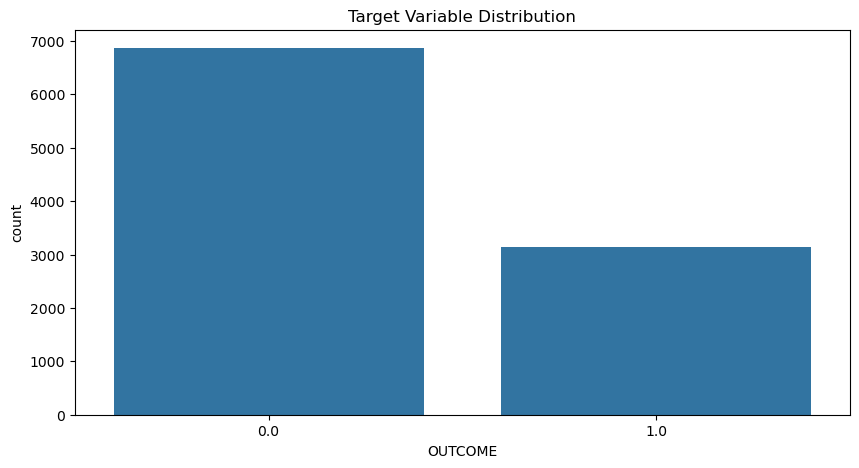

In [78]:
# Data Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='OUTCOME', data=data)
plt.title("Target Variable Distribution")
plt.show()

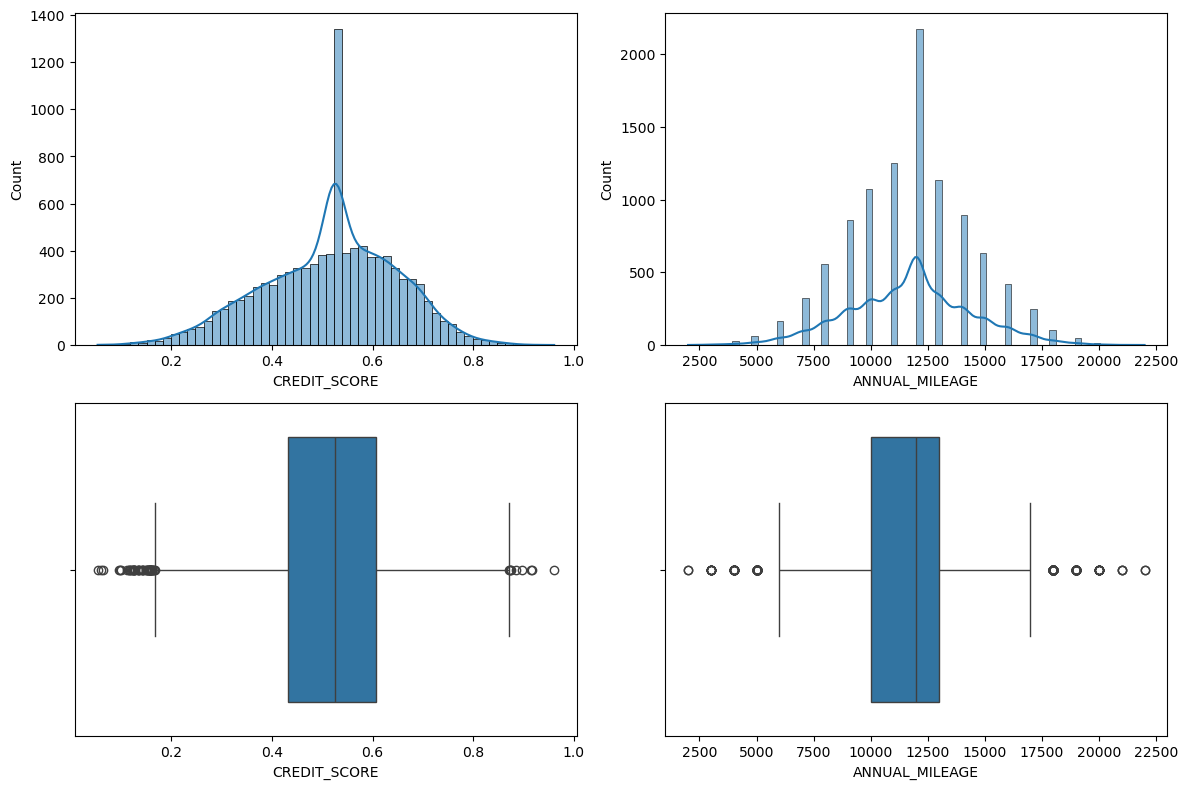

In [79]:
# Univariate analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data['CREDIT_SCORE'], kde=True, ax=axes[0, 0])
sns.histplot(data['ANNUAL_MILEAGE'], kde=True, ax=axes[0, 1])
sns.boxplot(x=data['CREDIT_SCORE'], ax=axes[1, 0])
sns.boxplot(x=data['ANNUAL_MILEAGE'], ax=axes[1, 1])
plt.tight_layout()
plt.show()


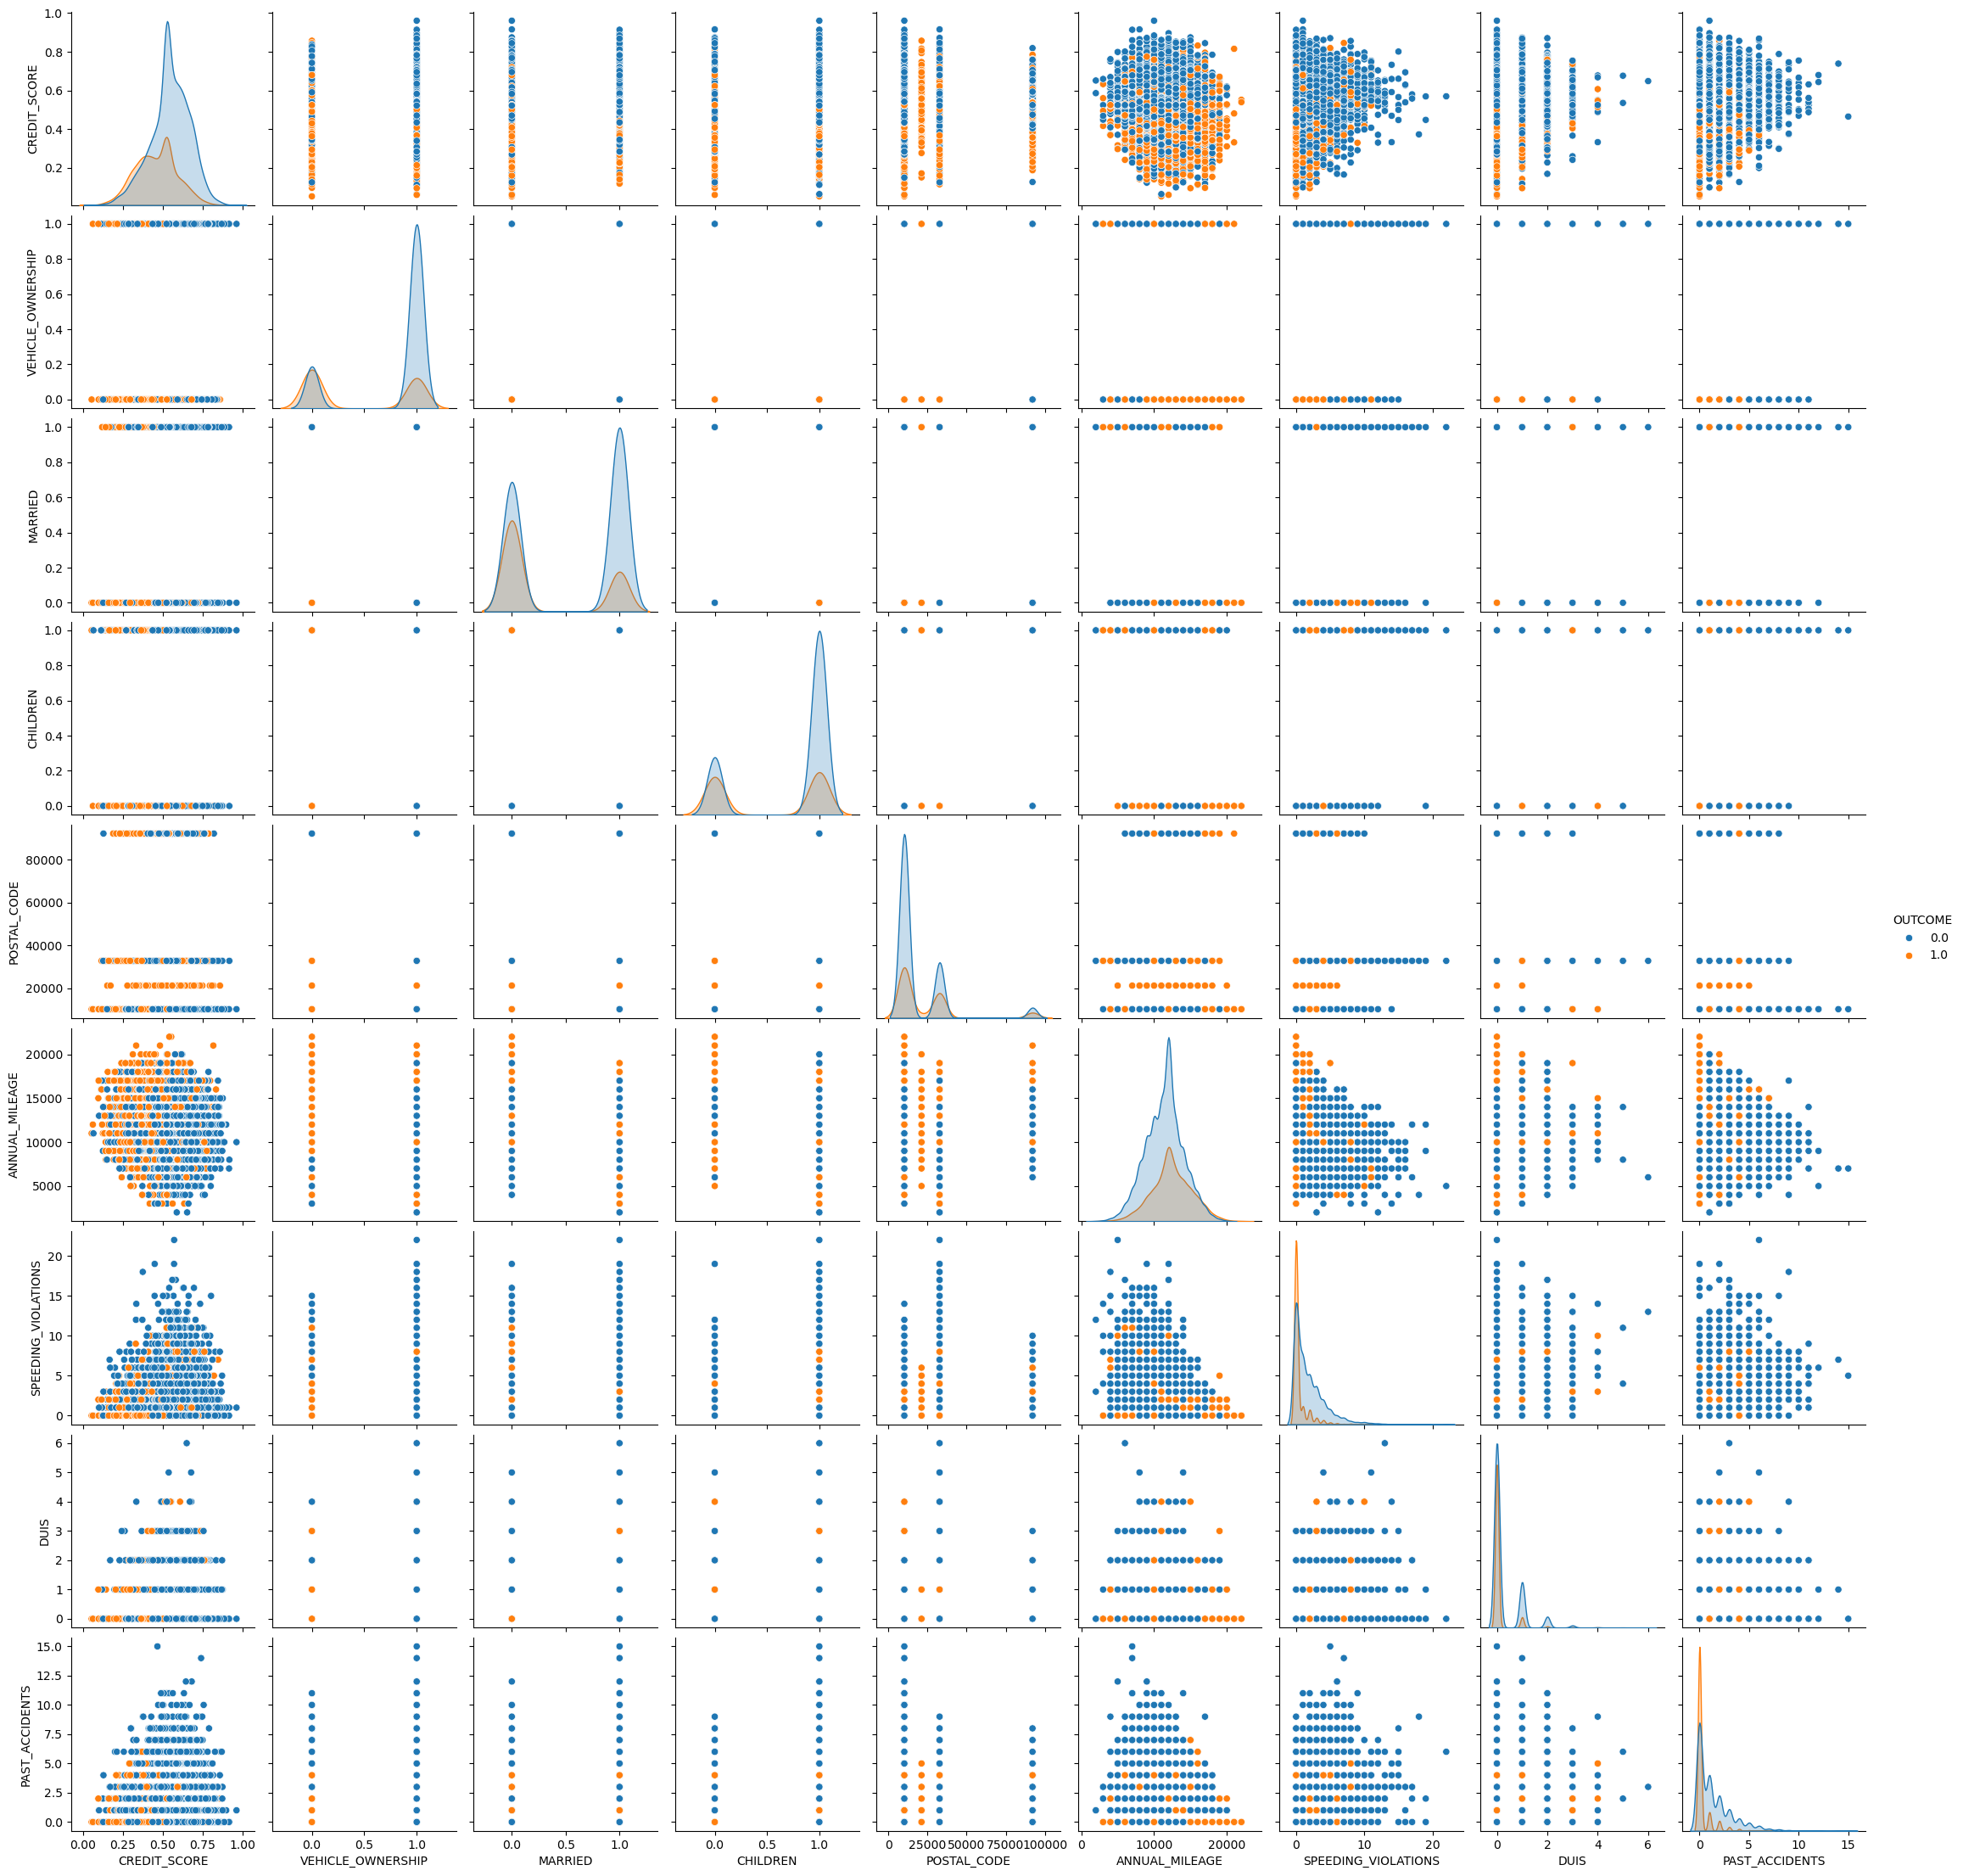

In [80]:
# Bivariate analysis
sns.pairplot(data, hue='OUTCOME')
plt.show()

In [81]:
# Checking skewness
skewness = data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].skew()
print("Skewness of Features:\n", skewness)

Skewness of Features:
 CREDIT_SCORE     -0.258131
ANNUAL_MILEAGE    0.009886
dtype: float64


In [82]:
# Handling skewness
data['CREDIT_SCORE'] = np.log1p(data['CREDIT_SCORE'])
data['ANNUAL_MILEAGE'] = np.log1p(data['ANNUAL_MILEAGE'])

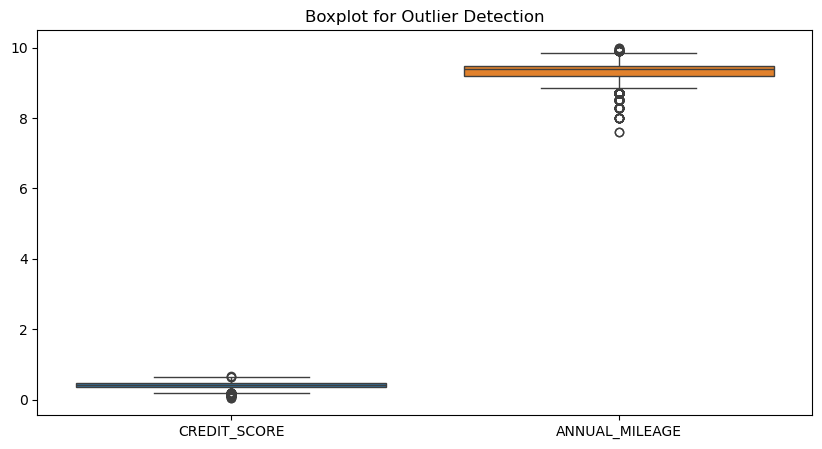

In [83]:
# Checking for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [84]:
# Handling outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']]))
data = data[(z_scores < 3).all(axis=1)]

In [85]:
# Encoding categorical variables
data['POSTAL_CODE'] = data['POSTAL_CODE'].astype(str)
data = pd.get_dummies(data, columns=['POSTAL_CODE'], drop_first=True)
categorical_cols = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


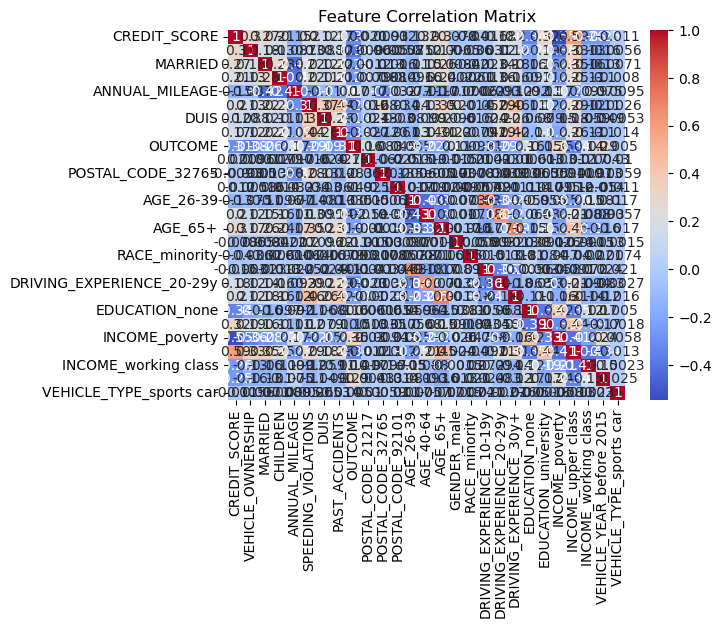

In [86]:
# Checking for multicollinearity
import statsmodels.api as sm
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [88]:
# Separating target variable
y = data['OUTCOME']
X = data.drop(columns=['OUTCOME'])

In [89]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [90]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [91]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [93]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [94]:
# Hyperparameter tuning using GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [5, 10, 20]},
    'AdaBoost': {'n_estimators': [50, 100]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

In [95]:
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=cv, scoring=make_scorer(f1_score))
        grid_search.fit(X_train_pca, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train_pca, y_train)
        best_models[name] = model

In [96]:
# Model evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test_pca)
    print(f"{name} Model:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression Model:

Accuracy: 0.8530280649926145
Precision: 0.8453757225433526
Recall: 0.8641063515509602
F1 Score: 0.8546384222059897
ROC AUC Score: 0.8530280649926145
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1354
         1.0       0.85      0.86      0.85      1354

    accuracy                           0.85      2708
   macro avg       0.85      0.85      0.85      2708
weighted avg       0.85      0.85      0.85      2708

[[1140  214]
 [ 184 1170]]
--------------------------------------------------
Random Forest Model:

Accuracy: 0.8829394387001477
Precision: 0.8711524695776665
Recall: 0.8988183161004432
F1 Score: 0.8847691748455108
ROC AUC Score: 0.8829394387001478
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1354
         1.0       0.87      0.90      0.88      1354

    accuracy                           0.88      2708
   macro avg       0.88      

In [97]:
# ANN Model
tf.keras.backend.clear_session()
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [98]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test))


Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7139 - loss: 0.5349 - val_accuracy: 0.8519 - val_loss: 0.3412
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8337 - loss: 0.3889 - val_accuracy: 0.8560 - val_loss: 0.3270
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8482 - loss: 0.3613 - val_accuracy: 0.8575 - val_loss: 0.3264
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8524 - loss: 0.3450 - val_accuracy: 0.8564 - val_loss: 0.3229
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8508 - loss: 0.3473 - val_accuracy: 0.8582 - val_loss: 0.3177
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8501 - loss: 0.3417 - val_accuracy: 0.8623 - val_loss: 0.3156
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8531 - loss: 0.3392 - val_accuracy: 0.8604 - val_loss: 0.3136
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8570 - loss: 0.3307 - 

100%|===================| 5411/5416 [03:59<00:00]        

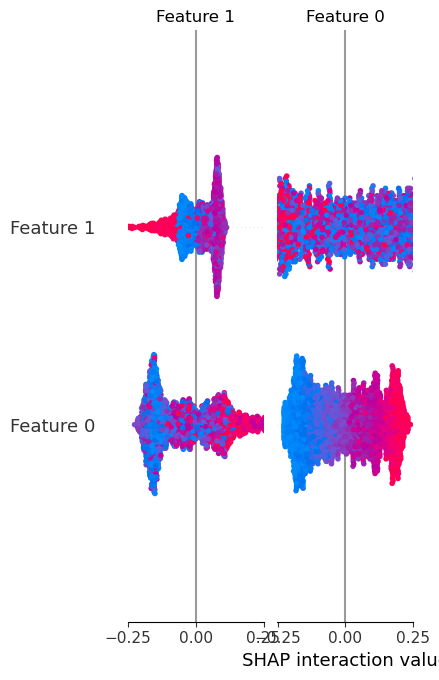

In [99]:
# Explainability with SHAP
explainer = shap.Explainer(best_models['Random Forest'], X_train_pca)
shap_values = explainer(X_test_pca)
shap.summary_plot(shap_values, X_test_pca)

In [100]:
# Explainability with LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_pca, feature_names=X.columns, class_names=['No Claim', 'Claim'], mode='classification')
exp = explainer_lime.explain_instance(X_test_pca[0], best_models['Random Forest'].predict_proba)
exp.show_in_notebook()